Dataset Shape: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
Missing Values Before Cleaning:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
dura

/tmp/ipython-input-3010077027.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type", data=df, palette="Set2")


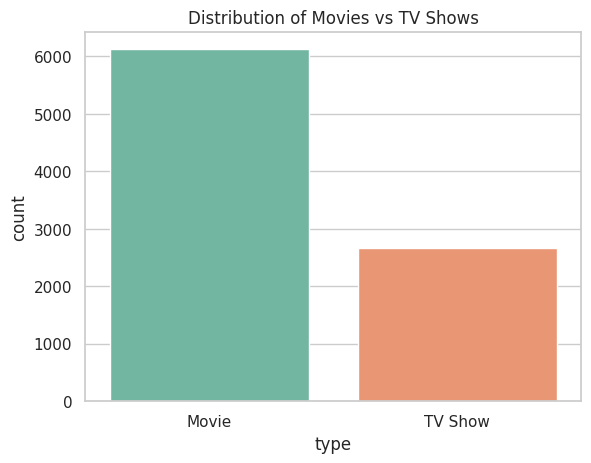

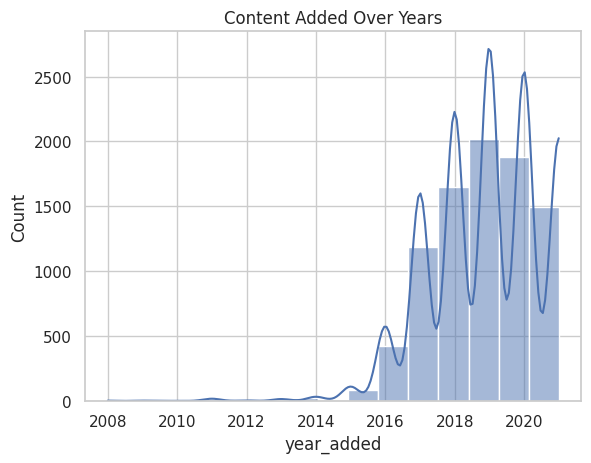

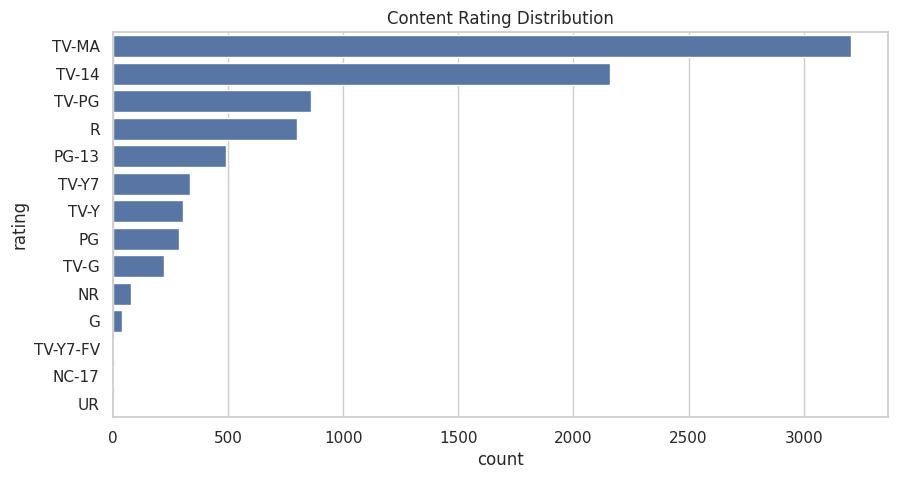

/tmp/ipython-input-3010077027.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Genre", data=genre_df, palette="viridis")


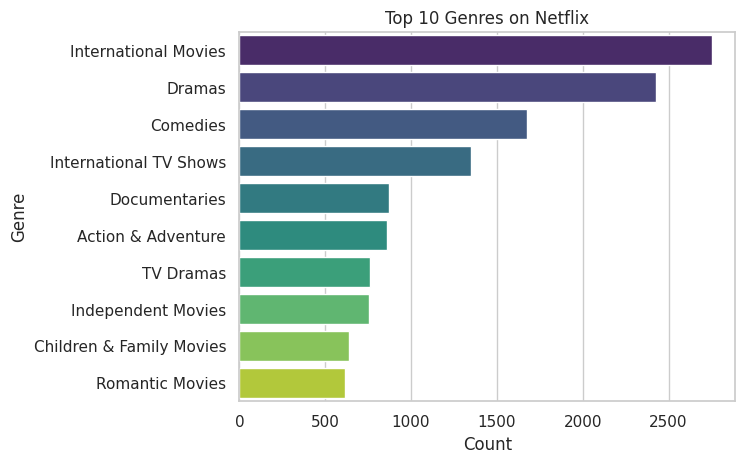

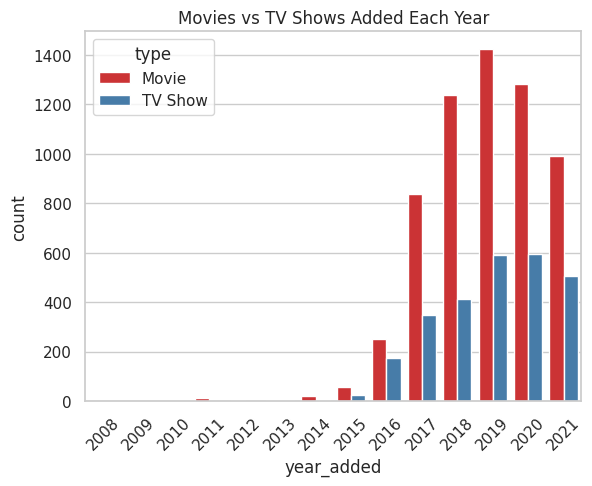

/tmp/ipython-input-3010077027.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="country", data=df[df["country"].isin(top_countries)], palette="magma")


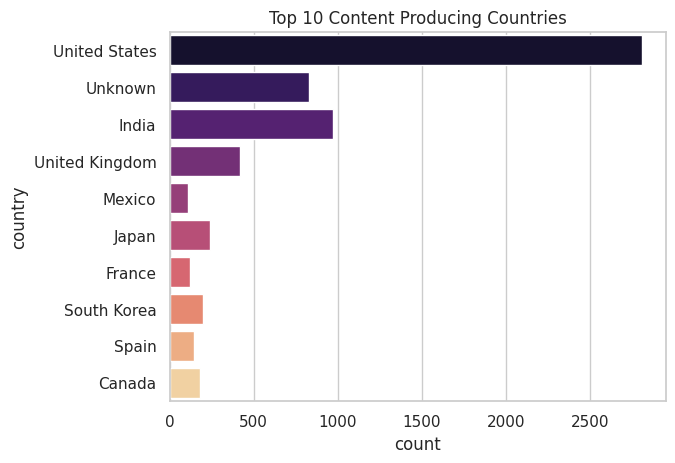

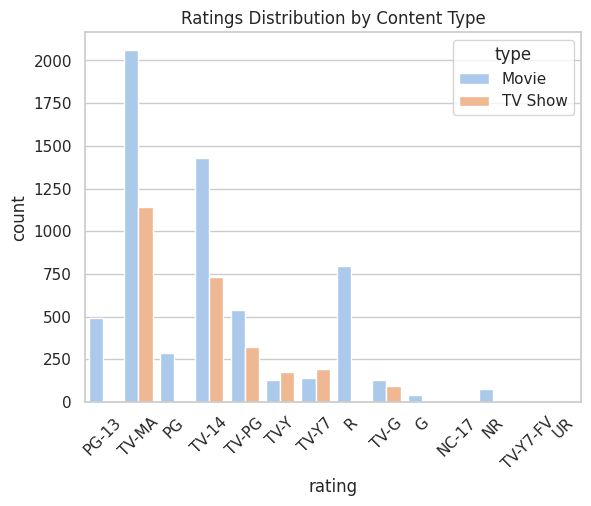

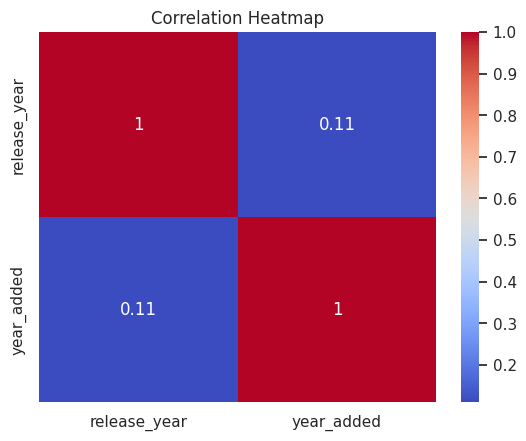

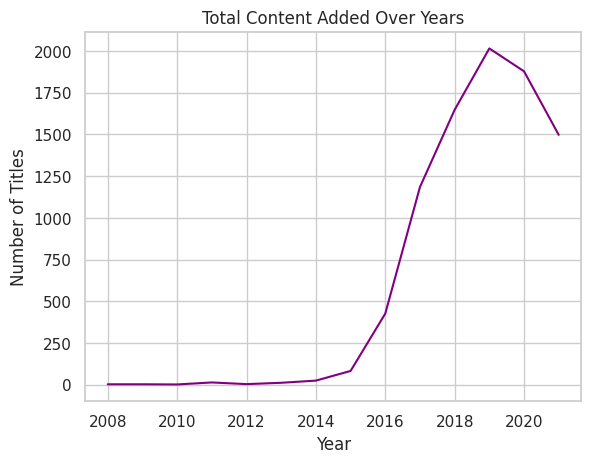

Movies Duration Boxplot


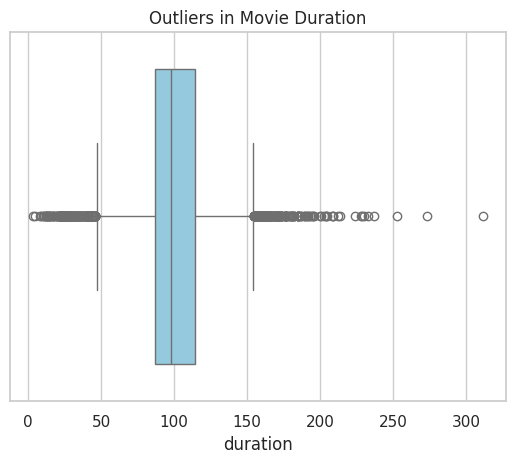

Average Release Year of Content: 2014.183162684869


In [5]:
# =========================================================
#  1. IMPORT LIBRARIES
# =========================================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

sns.set_theme(style="whitegrid")  # Set global plot style


# =========================================================
#  2. LOAD DATASET
# =========================================================
df = pd.read_csv("netflix_titles.csv")
print("Dataset Shape:", df.shape)
df.head()


# =========================================================
#  3. DATA OVERVIEW
# =========================================================
df.info()
df.describe(include="all")


# =========================================================
#  4. DATA CLEANING
# =========================================================

# Check missing values
print("Missing Values Before Cleaning:\n", df.isnull().sum())

# Fill missing categorical values
df["director"] = df["director"].fillna("Unknown")
df["cast"] = df["cast"].fillna("Unknown")
df["country"] = df["country"].fillna("Unknown")

# Drop rows where critical info is missing
df.dropna(subset=["date_added", "rating", "duration"], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

print("Missing Values After Cleaning:\n", df.isnull().sum())


# =========================================================
#  5. FEATURE ENGINEERING
# =========================================================

# Convert date_added to datetime
df["date_added"] = pd.to_datetime(df["date_added"], format='mixed')

# Extract year for trend analysis
df["year_added"] = df["date_added"].dt.year


# =========================================================
#  6. UNIVARIATE ANALYSIS
# =========================================================

# Distribution of Movies vs TV Shows
sns.countplot(x="type", data=df, palette="Set2")
plt.title("Distribution of Movies vs TV Shows")
plt.show()

# Content added over years
sns.histplot(df["year_added"], bins=15, kde=True)
plt.title("Content Added Over Years")
plt.show()

# Ratings distribution
plt.figure(figsize=(10,5))
sns.countplot(y="rating", data=df, order=df["rating"].value_counts().index)
plt.title("Content Rating Distribution")
plt.show()


# =========================================================
#  7. GENRE ANALYSIS
# =========================================================

# Split genres and count frequency
genres = df["listed_in"].str.split(", ")
all_genres = sum(genres, [])
genre_counts = Counter(all_genres)

genre_df = pd.DataFrame(genre_counts.items(), columns=["Genre", "Count"])
genre_df = genre_df.sort_values(by="Count", ascending=False).head(10)

sns.barplot(x="Count", y="Genre", data=genre_df, palette="viridis")
plt.title("Top 10 Genres on Netflix")
plt.show()


# =========================================================
#  8. BIVARIATE ANALYSIS
# =========================================================

# Movies vs TV Shows added each year
sns.countplot(x="year_added", hue="type", data=df, palette="Set1")
plt.xticks(rotation=45)
plt.title("Movies vs TV Shows Added Each Year")
plt.show()

# Top content producing countries
top_countries = df["country"].value_counts().head(10).index
sns.countplot(y="country", data=df[df["country"].isin(top_countries)], palette="magma")
plt.title("Top 10 Content Producing Countries")
plt.show()

# Rating vs Type
sns.countplot(x="rating", hue="type", data=df, palette="pastel")
plt.xticks(rotation=45)
plt.title("Ratings Distribution by Content Type")
plt.show()


# =========================================================
#  9. CORRELATION ANALYSIS
# =========================================================

corr = df.select_dtypes(include="number").corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# =========================================================
#  10. CONTENT GROWTH TREND
# =========================================================

df.groupby("year_added")["type"].count().plot(color="purple")
plt.title("Total Content Added Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()


# =========================================================
#  11. OUTLIER DETECTION — MOVIE DURATION
# =========================================================

# Filter only movies
movie_df = df[df["type"] == "Movie"].copy()

# Convert duration from text (e.g., "90 min") to numeric minutes
movie_df["duration"] = movie_df["duration"].str.replace(" min", "").astype(int)

print("Movies Duration Boxplot")
sns.boxplot(x=movie_df["duration"], color="skyblue")
plt.title("Outliers in Movie Duration")
plt.show()


# =========================================================
#  12. STATISTICAL INSIGHT
# =========================================================

# Average release year using NumPy
avg_year = np.mean(df["release_year"])
print("Average Release Year of Content:", avg_year)